## Recognizing mnist data set using Convolutional Neural Network(CNN)

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import CSVLogger, EarlyStopping, ModelCheckpoint
from keras.datasets import mnist
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## load the mnist data set

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


# Prepare the data

* 1- Reshape the images from 28 x 28 to 28 x 28 x 1 -> is the color Channel (gray scale)
* For colored pictures we will need 3 Channels

In [3]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# 2- Scale the inputs data from 0-255 -> 0-1

In [4]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

# 3- Prepare the labels -> One Hot Encoding

In [5]:
y_train = to_categorical(y_train)
y_test1 = to_categorical(y_test)

# 4- Create and build the Model

In [6]:
model_cnn = Sequential()
# Add the layers to the Model
# conv2D_ 1
model_cnn.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu", input_shape=(28,28,1)))
model_cnn.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))

# conv2D_ 2
model_cnn.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"))
model_cnn.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))

# Flatten the output of the conv2D
model_cnn.add(Flatten())   # Input of the Neural Network

# NN
model_cnn.add(Dense(units=128, activation="relu", name="1_hidden_layer"))
model_cnn.add(Dense(units=64, activation="relu", name="2_hidden_layer"))
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(units=10, activation="softmax", name="Output_layer"))

In [7]:
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 1_hidden_layer (Dense)          │ (None, 128)            │     2,769,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2_hidden_layer (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,797,034 (10.67 MB)

 Trainable params: 2,797,034 (10.67 MB)

 Non-trainable params: 0 (0.00 B)

# Compile an train the Model

In [8]:
LEARNING_RATE = 0.001
EPOCHS = 5

# Compile the cnn_Model
model_cnn.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=LEARNING_RATE), metrics=["accuracy"])

# train the Model
history = model_cnn.fit(X_train, y_train, epochs=EPOCHS, batch_size=512, validation_split=0.2, verbose=1, shuffle=True)

Epoch 1/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 35s 342ms/step - accuracy: 0.7470 - loss: 0.7703 - val_accuracy: 0.9763 - val_loss: 0.0799
Epoch 2/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 31s 325ms/step - accuracy: 0.9720 - loss: 0.0938 - val_accuracy: 0.9842 - val_loss: 0.0562
Epoch 3/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 30s 323ms/step - accuracy: 0.9824 - loss: 0.0559 - val_accuracy: 0.9856 - val_loss: 0.0489
Epoch 4/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 31s 327ms/step - accuracy: 0.9883 - loss: 0.0400 - val_accuracy: 0.9858 - val_loss: 0.0488
Epoch 5/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 31s 327ms/step - accuracy: 0.9899 - loss: 0.0330 - val_accuracy: 0.9876 - val_loss: 0.0444


## Visualiz the accuracy

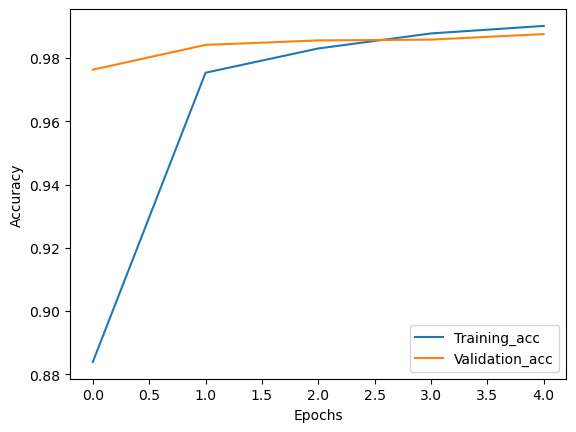

In [9]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["Training_acc", "Validation_acc"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

## Visualiz the loss

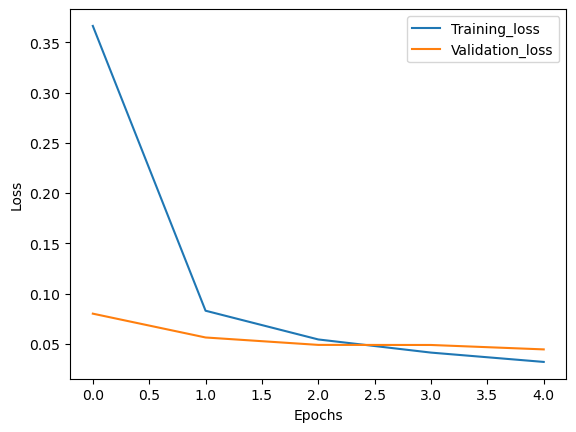

In [10]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["Training_loss", "Validation_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [12]:
predictions = model_cnn.predict(X_test)
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


array([[1.6293061e-08, 1.7794424e-09, 7.8054585e-09, ..., 9.9999917e-01,
        1.0135966e-08, 4.6861277e-07],
       [9.1744468e-10, 1.8748080e-05, 9.9998116e-01, ..., 2.1125739e-09,
        9.4028117e-08, 3.5025552e-11],
       [1.6373059e-07, 9.9997354e-01, 3.4636171e-06, ..., 4.4945423e-06,
        3.9817428e-06, 5.9463827e-07],
       ...,
       [8.9000801e-10, 1.9891008e-08, 1.7597045e-10, ..., 4.3526129e-09,
        1.6565053e-07, 1.9380475e-07],
       [6.2468524e-09, 1.7195712e-09, 4.6570037e-10, ..., 3.7919672e-12,
        3.9271445e-06, 2.8678591e-07],
       [1.2164743e-08, 2.7253528e-11, 1.5643743e-09, ..., 1.2955372e-13,
        4.6533231e-09, 1.3388821e-09]], dtype=float32)

In [13]:
rounded_predictions = np.argmax(predictions, axis = 1)
rounded_predictions 

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [16]:
cm = confusion_matrix(y_test, rounded_predictions)
cm

array([[ 974,    1,    0,    0,    0,    0,    3,    0,    1,    1],
       [   0, 1132,    0,    1,    0,    0,    1,    1,    0,    0],
       [   2,    2, 1017,    0,    0,    0,    0,    6,    5,    0],
       [   0,    0,    1, 1002,    0,    2,    0,    0,    4,    1],
       [   0,    0,    0,    0,  973,    0,    2,    0,    0,    7],
       [   2,    0,    0,    8,    0,  879,    2,    0,    1,    0],
       [   1,    2,    0,    1,    1,    3,  947,    0,    3,    0],
       [   1,    0,    4,    0,    1,    0,    0, 1011,    1,   10],
       [   2,    1,    1,    2,    0,    0,    0,    1,  962,    5],
       [   4,    1,    1,    0,    6,    2,    0,    0,    0,  995]],
      dtype=int64)

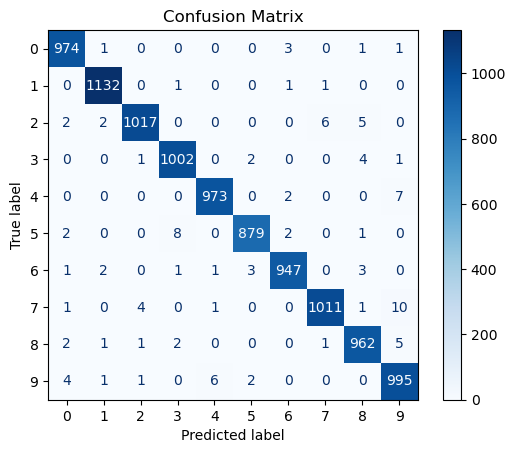

In [18]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

## evaluate the model

In [19]:
eval_loss, eval_acc = model_cnn.evaluate(X_test, y_test1)
print(eval_loss)
print(eval_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9865 - loss: 0.0401
0.032806094735860825
0.9891999959945679
